In [124]:
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import numpy as np

# Softmax

tensor([0.1429, 0.2857, 0.5714])


<ipython-input-28-41a13c8a4f43>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(n_p)


([<matplotlib.patches.Wedge at 0x2228adf02e0>,
 [Text(0.9910657674599295, 0.4772720865178073, ''),
  Text(-0.24477291260077555, 1.0724207295912054, ''),
  Text(-0.2447733142298589, -1.072420637921954, '')])

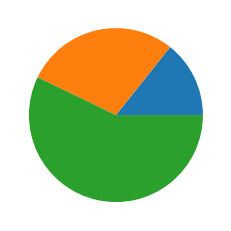

In [28]:
%matplotlib inline
p = torch.tensor([1.2, 2.4, 4.8]).float()

n_p = p / torch.sum(p)
print(n_p)

torch.max(n_p), torch.argmax(n_p)
plt.pie(n_p)

tensor([0.0244, 0.0811, 0.8944])


([<matplotlib.patches.Wedge at 0x1dfa2c988b0>,
 [Text(1.096759495524473, 0.08437184943393954, ''),
  Text(1.0095055928904035, 0.43691928078650294, ''),
  Text(-1.0400441414706938, -0.35820131740752664, '')])

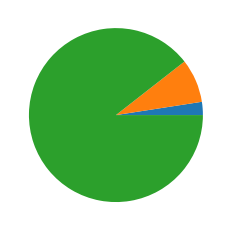

In [685]:
n_sm = torch.exp(p) / torch.sum( torch.exp(p))
print(n_sm)
plt.pie(n_sm)

In [43]:
 torch.softmax(p, axis=1)

tensor([[0.0999, 0.4052, 0.4949],
        [0.0900, 0.2447, 0.6652]])

In [37]:
p = torch.tensor([[1.4, 2.8 , 3.0],
                  [1, 2, 3]])
torch.softmax(p, axis=1)

tensor([[0.0999, 0.4052, 0.4949],
        [0.0900, 0.2447, 0.6652]])

# Blob 분류

[2 2 2 1 0 2 0 2 0 0 1 1 0 1 1]
['yellow', 'yellow', 'yellow', 'red', 'blue', 'yellow', 'blue', 'yellow', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red']
torch.Size([15, 2]) torch.Size([15])


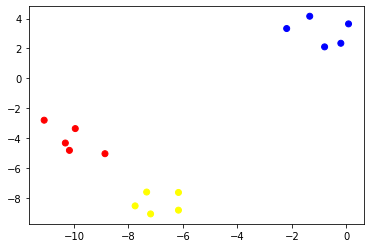

In [31]:
X, y = make_blobs(n_samples=15, n_features=2, centers=3, random_state=1)
print(y)
d = ['blue', 'red', 'yellow']
colors = [ d[i]  for i in y]
print(colors)

plt.scatter(X[:, 0], X[:, 1], color=colors)


X = torch.tensor(X).float()
y = torch.tensor(y).long()

print(X.shape, y.shape)

In [32]:
layer = torch.nn.Linear(2, 3)

optimizer = optim.SGD(layer.parameters() , lr=0.01)

epochs = 1000
for epoch in range(epochs):
    
    hypothesis = layer(X)
    cost_fn = nn.CrossEntropyLoss()    

    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')     


epoch = 1    cost=1.6807876825332642
epoch = 101    cost=0.1374778002500534
epoch = 201    cost=0.09425222873687744
epoch = 301    cost=0.07308217883110046
epoch = 401    cost=0.06012240797281265
epoch = 501    cost=0.051279954612255096
epoch = 601    cost=0.044827163219451904
epoch = 701    cost=0.03989414498209953
epoch = 801    cost=0.03599139302968979
epoch = 901    cost=0.03282105550169945


In [33]:
torch.set_printoptions(precision=4, sci_mode=False)
predict = layer(X)
predict = torch.softmax(predict, axis=1)
print(predict)

tensor([[    0.0000,     0.0049,     0.9951],
        [    0.0000,     0.0691,     0.9309],
        [    0.0000,     0.0333,     0.9667],
        [    0.0003,     0.9780,     0.0217],
        [    0.9531,     0.0449,     0.0020],
        [    0.0000,     0.0097,     0.9903],
        [    0.9288,     0.0689,     0.0023],
        [    0.0000,     0.0218,     0.9782],
        [    0.9904,     0.0095,     0.0001],
        [    0.9738,     0.0262,     0.0000],
        [    0.0016,     0.9942,     0.0042],
        [    0.0003,     0.9020,     0.0977],
        [    0.9920,     0.0080,     0.0000],
        [    0.0022,     0.9971,     0.0007],
        [    0.0005,     0.9895,     0.0100]], grad_fn=<SoftmaxBackward>)


In [721]:
torch.argmax(predict, axis=1)

tensor([2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1])

In [722]:
(y ==  torch.argmax(predict, axis=1)).float().mean()

tensor(1.)

# 다층 신경망

In [49]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()

layer1 = nn.Linear(2, 10)
layer2 = nn.Linear(10, 1)
sigmoid = nn.Sigmoid()

model = nn.Sequential(layer1, sigmoid, layer2, sigmoid)

optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 1000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.6932905912399292
epoch = 1001    cost=0.6900088787078857
epoch = 2001    cost=0.6689248085021973
epoch = 3001    cost=0.5201542973518372
epoch = 4001    cost=0.20489922165870667


tensor([[0.0425],
        [0.9405],
        [0.9257],
        [0.0908]], grad_fn=<SigmoidBackward>)

In [52]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()


model = nn.Sequential(
          nn.Linear(2,10),
          nn.Sigmoid(),
          nn.Linear(10,1),
          nn.Sigmoid(),          
        )
    
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 1000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.7209998369216919
epoch = 1001    cost=0.6922403573989868
epoch = 2001    cost=0.6891096830368042
epoch = 3001    cost=0.6564802527427673
epoch = 4001    cost=0.3769725263118744


tensor([[0.0637],
        [0.8962],
        [0.8909],
        [0.1416]], grad_fn=<SigmoidBackward>)

In [53]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 1)        
        
    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x
    
model = Model()
    
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 1000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.6984871625900269
epoch = 1001    cost=0.6920937299728394
epoch = 2001    cost=0.6890671253204346
epoch = 3001    cost=0.6648598313331604
epoch = 4001    cost=0.4656919240951538


tensor([[0.0701],
        [0.8711],
        [0.8635],
        [0.1898]], grad_fn=<SigmoidBackward>)

In [54]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.layer = nn.Sequential(
          nn.Linear(2,10),
          nn.Sigmoid(),
          nn.Linear(10,1),
          nn.Sigmoid(),          
        )
        
    def forward(self, x):        
        return self.layer(x)     
    
model = Model()
    
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 500 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.7120321989059448
epoch = 501    cost=0.6897697448730469
epoch = 1001    cost=0.6831938028335571
epoch = 1501    cost=0.6608244776725769
epoch = 2001    cost=0.6008096933364868
epoch = 2501    cost=0.4897088408470154
epoch = 3001    cost=0.33784106373786926
epoch = 3501    cost=0.1932464987039566
epoch = 4001    cost=0.10948508232831955
epoch = 4501    cost=0.06873337179422379


tensor([[0.0329],
        [0.9509],
        [0.9563],
        [0.0601]], grad_fn=<SigmoidBackward>)

# Adam 최적화

torch.Size([200, 2]) torch.Size([200, 1])


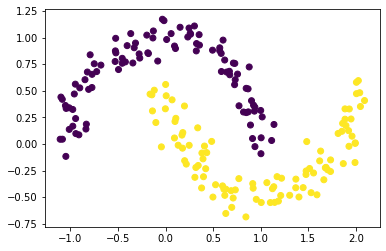

In [143]:
X, y = make_moons(n_samples=200, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

X = torch.tensor(X).float()
y = torch.tensor(y).float().reshape(-1,1)

print(X.shape, y.shape)

In [162]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.layer = nn.Sequential(
          nn.Linear(2,10),
          nn.Sigmoid(),
          nn.Linear(10,1),
          nn.Sigmoid(),          
        )
        
    def forward(self, x):        
        return self.layer(x)     
    
model = Model()
    
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 9000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 500 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      

epoch = 1    cost=0.764817476272583
epoch = 501    cost=0.49911174178123474
epoch = 1001    cost=0.368547260761261
epoch = 1501    cost=0.31170034408569336
epoch = 2001    cost=0.2913980484008789
epoch = 2501    cost=0.28700554370880127
epoch = 3001    cost=0.2861558794975281
epoch = 3501    cost=0.28570571541786194
epoch = 4001    cost=0.285073459148407
epoch = 4501    cost=0.28419068455696106
epoch = 5001    cost=0.28274425864219666
epoch = 5501    cost=0.27531546354293823
epoch = 6001    cost=0.2590964436531067
epoch = 6501    cost=0.2101517915725708
epoch = 7001    cost=0.13338960707187653
epoch = 7501    cost=0.07775452733039856
epoch = 8001    cost=0.04851342365145683
epoch = 8501    cost=0.032121412456035614


In [163]:
((model(X) >0.5).float() == y).float().mean()

tensor(1.)

In [159]:
col = ['r', 'g']
c = [int(i[0])  for i in y.numpy()]
print(c)

[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]


(900, 2)


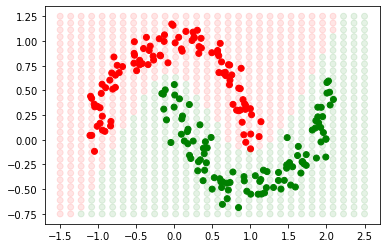

In [165]:
col = ['r', 'g']
c = [col[ int(i)] for i in y.numpy().flatten()]
plt.scatter(X[:,0], X[:,1], c= c)

xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 30),
                     np.linspace(-0.75, 1.25, 30))
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape)

p = (model(  torch.tensor(grid).float() ) > 0.5).long().numpy().flatten()
col = ['r', 'g']
c = [col[i] for i in p]

plt.scatter(grid[:, 0], grid[:, 1], c= c, alpha=0.1)

# 특징 정규화

In [749]:
X = torch.tensor([[10, 25, 100],
              [12, 29, 140],
              [9, 30, 150]]).float()

X / torch.max(X, axis=0)[0]

tensor([[0.8333, 0.8333, 0.6667],
        [1.0000, 0.9667, 0.9333],
        [0.7500, 1.0000, 1.0000]])

In [35]:
data = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)

X = data[:, 0:8] 

y = data[:, 8]

X = torch.tensor(X).float()
X = X / torch.max(X, axis=0)[0]

y = torch.tensor(y).reshape(-1,1)

(768, 9)


In [36]:
layer = torch.nn.Linear(8, 1)

optimizer = optim.SGD(layer.parameters() , lr=0.1)

epochs = 2000
for epoch in range(epochs):    
    hypothesis = torch.sigmoid(layer(X))    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 2000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')
        
predict = torch.sigmoid(layer(X))  > 0.5
(predict == y).float().mean()        

epoch = 1    cost=0.705902636051178


tensor(0.7604)

#  CNN

In [105]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (1.0, ))
                               ])

trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST\raw



C:\Users\ckt\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [106]:
image, label = next(iter(trainloader))

In [107]:
print(image.shape)
print(label)

torch.Size([64, 1, 28, 28])
tensor([1, 9, 4, 4, 1, 3, 8, 7, 7, 4, 4, 9, 0, 3, 8, 3, 3, 9, 1, 9, 1, 7, 2, 6,
        0, 5, 5, 8, 4, 6, 9, 1, 5, 1, 2, 0, 0, 5, 3, 7, 9, 9, 5, 9, 6, 9, 1, 3,
        4, 6, 2, 7, 7, 7, 5, 5, 7, 6, 8, 9, 9, 6, 2, 3])


In [ ]:
#image[0,0,::] # 0 ~1사이로 정규화되어 있음

Coat


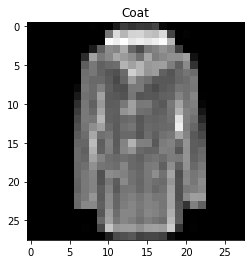

In [108]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[label[3]])
plt.title(class_names[label[3]])
plt.imshow(image[3,0,:,:], cmap='gray')

In [122]:
class Model(nn.Module):
    def __init__(self, num_classes=10):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
    nn.Conv2d(1,32,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.Dropout(p=0.5),            
    nn.MaxPool2d(2,2),

    nn.Conv2d(32,128,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.Dropout(p=0.5),            
    nn.MaxPool2d(2,2),

    nn.Flatten(),
    nn.Linear(128*7*7, 256),
    nn.ReLU(),
    nn.Dropout(p=0.5),                        
    nn.Linear(256,10))
        
    def forward(self, x):
        out = self.layer1(x)
        return out

In [138]:
model     = Model()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()    

epochs = 1

for e in range(epochs) :
    running_loss = 0
    for idx, (images, labels) in enumerate(trainloader):
       
        
        y_pred = model(images)
        loss = loss_fn(y_pred, labels)  
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()    
        print(f"\repoch {e+1},   {idx}/{len(trainloader)}   {loss.item()}", end='' )
    print(f"\rTraining loss: {running_loss/len(trainloader)}") 

AssertionError: Torch not compiled with CUDA enabled

In [128]:
accuracy = 0
with torch.no_grad():
    for images, labels in testloader: #trainloader:
        y_pred = model(images)
        correct = (torch.argmax(y_pred, dim=1) == labels).float()
        accuracy += torch.mean(correct)        
accuracy/len(testloader) 

tensor(0.8449)

In [121]:
from torchsummary import summary

summary(model, (1, 28, 28)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          36,992
              ReLU-5          [-1, 128, 14, 14]               0
         MaxPool2d-6            [-1, 128, 7, 7]               0
           Flatten-7                 [-1, 6272]               0
            Linear-8                  [-1, 256]       1,605,888
              ReLU-9                  [-1, 256]               0
           Linear-10                   [-1, 10]           2,570
Total params: 1,645,770
Trainable params: 1,645,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.91
Params size (MB): 6.28
Estimat

In [137]:
model     = Model()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()    

epochs = 2

for e in range(epochs) :
    running_loss = 0
    model.train() 
    for idx, (images, labels) in enumerate(trainloader):
        y_pred = model(images)
        loss = loss_fn(y_pred, labels)  
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()    
        print(f"\repoch {e+1},   {idx}/{len(trainloader)}   {running_loss/(idx+1)}", end='' )
    accuracy = 0
    model.eval()
    with torch.no_grad():
            for images, labels in testloader: #trainloader:
                y_pred = model(images)
                correct = (torch.argmax(y_pred, dim=1) == labels).float()
                accuracy += torch.mean(correct)                
    print(f"   accuracy={accuracy/len(testloader)}")

epoch 1,   272/938   0.7148639021557329

KeyboardInterrupt: 